# Case study: Spis powszechny USA

## Wczytanie danych

In [1]:
import pandas as pd

In [2]:
colnames = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
            'marital_status', 'occupation', 'relationship', 'race',
            'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
            'native_country', 'wage_class']

In [3]:
data = pd.read_csv("Dane/adult/adult.data", names=colnames, skipinitialspace=True)  # usunięcie początkowych spacji
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Eksploracja danych i inżynieria cech

In [6]:
import matplotlib.pyplot as plt

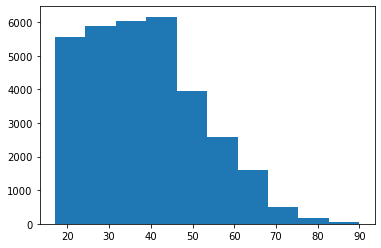

In [7]:
plt.hist(data.age)
plt.show()

In [8]:
data.workclass.value_counts()  # ewentualnie pokombinować z obsługą rzadkich kategorii

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [9]:
data = data.drop(["fnlwgt"], axis=1)  # wyrzucamy, bo nie do końca wiadomo, czym ta zmienna jest (może zależy od y?)
data.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'wage_class'],
      dtype='object')

In [10]:
pd.crosstab(data.education, data.education_num)

education_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,933,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1175,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,433,0,0,0,0,0,0,0,0
1st-4th,0,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,333,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,646,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,514,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1067,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1382,0,0,0,0,0


In [11]:
data = data.drop(["education"], axis=1)  # wyrzucamy 'education': występuje korespondencja jeden-do-jeden z 'education_num'
data.columns

Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'wage_class'],
      dtype='object')

In [12]:
data["wage_class"] = 1 - (data["wage_class"] == data["wage_class"].iloc[0])  # '0': niskie zarobki, '1': wysokie zarobki
data["wage_class"]

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: wage_class, Length: 32561, dtype: int64

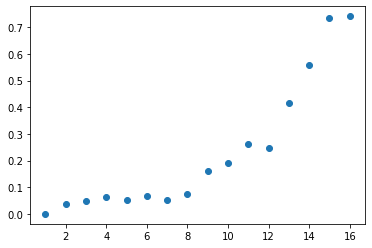

In [13]:
wage_vs_edu = data.groupby('education_num')["wage_class"].mean()

plt.scatter(wage_vs_edu.index, wage_vs_edu)  # ewentualne grupowanie kategorii o podobnych zarobkach
plt.show()

In [14]:
data.marital_status.value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [15]:
data.groupby('marital_status')["wage_class"].mean()

marital_status
Divorced                 0.104209
Married-AF-spouse        0.434783
Married-civ-spouse       0.446848
Married-spouse-absent    0.081340
Never-married            0.045961
Separated                0.064390
Widowed                  0.085599
Name: wage_class, dtype: float64

In [16]:
data.marital_status.replace({"Married-AF-spouse": "Married-civ-spouse"}).value_counts()

Married-civ-spouse       14999
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Name: marital_status, dtype: int64

In [17]:
data["marital_status"] = data.marital_status.replace({"Married-AF-spouse": "Married-civ-spouse"})
data

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [18]:
data.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [19]:
data.relationship.value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [20]:
data.race.value_counts()  # grupowanie danych: do dyskusji (biały vs. nie-biały?) (UWAGA: kwestie etyczne!)

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [21]:
data.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [22]:
data["sex"] = data["sex"].replace({"Male": 0, "Female": 1})  # ewentualnie: map()
data

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,1,0,0,38,United-States,0
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,0,40,United-States,1
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,1,0,0,40,United-States,0
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,0,0,0,20,United-States,0


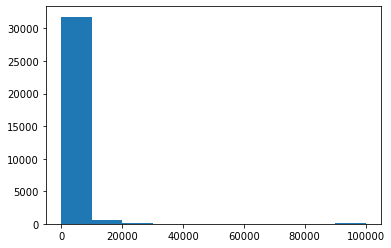

In [23]:
plt.hist(data.capital_gain)
plt.show()

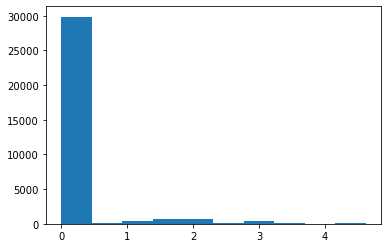

In [24]:
import numpy as np

plt.hist(np.log(1 + data.capital_gain / 1000))
plt.show()

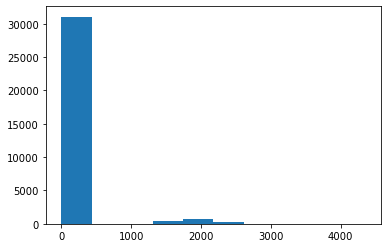

In [25]:
plt.hist(data.capital_loss)
plt.show()

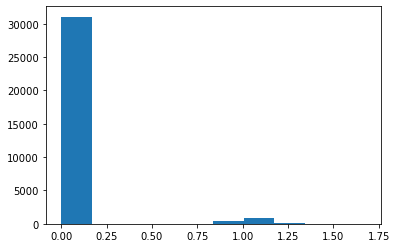

In [26]:
plt.hist(np.log(1 + data.capital_loss / 1000))
plt.show()

In [27]:
data["capital_gain"] = np.log(1 + data.capital_gain / 1000)  # przyciągnięcie dużych wartości do zera (modele liniowe)
data["capital_loss"] = np.log(1 + data.capital_loss / 1000)

data

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,0,1.154993,0.0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0.000000,0.0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0.000000,0.0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0.000000,0.0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0.000000,0.0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,1,0.000000,0.0,38,United-States,0
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0.000000,0.0,40,United-States,1
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,1,0.000000,0.0,40,United-States,0
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,0,0.000000,0.0,20,United-States,0


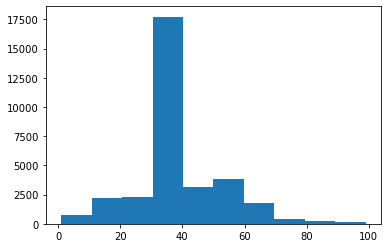

In [28]:
plt.hist(data.hours_per_week)
plt.show()

In [29]:
data.native_country.value_counts()
# np.cumsum(sorted(data.native_country.value_counts()))

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [30]:
data["is_native_us"] = (data["native_country"] == "United-States").astype(int)
data = data.drop(["native_country"], axis=1)

data.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,wage_class,is_native_us
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,0,1.154993,0.0,40,0,1
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0.000000,0.0,13,0,1
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0.000000,0.0,40,0,1
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0.000000,0.0,40,0,1
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0.000000,0.0,40,0,0


## Skalowanie danych i zmienne kategoryczne

In [31]:
X, y = data.drop(['wage_class'], axis=1), data['wage_class']

In [32]:
# pd.get_dummies?
X_ohf = pd.get_dummies(X)  # wersja pełna dla modeli drzewiastych
X_ohf.head()

,age,education_num,sex,capital_gain,capital_loss,hours_per_week,is_native_us,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,13,0,1.154993,0.0,40,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,13,0,0.000000,0.0,13,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,9,0,0.000000,0.0,40,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,53,7,0,0.000000,0.0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,1,0.000000,0.0,40,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [33]:
X_ohr = pd.get_dummies(X, drop_first=True)  # wersja zredukowana dla modeli liniowych
X_ohr.head()

,age,education_num,sex,capital_gain,capital_loss,hours_per_week,is_native_us,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,13,0,1.154993,0.0,40,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,50,13,0,0.000000,0.0,13,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,9,0,0.000000,0.0,40,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,53,7,0,0.000000,0.0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,1,0.000000,0.0,40,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_ohr[["age", "education_num", "capital_gain", "capital_loss", "hours_per_week"]
     ] = scaler.fit_transform(X_ohr[["age", "education_num", "capital_gain", "capital_loss", "hours_per_week"]])
    
X_ohr.head()  # formalnie powinniśmy skalować po podziale na train-test

,age,education_num,sex,capital_gain,capital_loss,hours_per_week,is_native_us,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0.030671,1.134739,0,1.545859,-0.21917,-0.035429,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0.837109,1.134739,0,-0.276585,-0.21917,-2.222153,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.042642,-0.420060,0,-0.276585,-0.21917,-0.035429,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1.057047,-1.197459,0,-0.276585,-0.21917,-0.035429,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.775768,1.134739,1,-0.276585,-0.21917,-0.035429,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


## Budowanie modelu ML

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [36]:
X_ohf_train, X_ohf_test, y_train, y_test = train_test_split(X_ohf, y,
                                                            test_size=0.15, random_state=123)

X_ohr_train, X_ohr_test, y_train, y_test = train_test_split(X_ohr, y,
                                                            test_size=0.15, random_state=123)

# inny sposób (jednoczesny podział większej liczby danych)
X_ohr_train, X_ohr_test, X_ohf_train, X_ohf_test, y_train, y_test = train_test_split(X_ohr, X_ohf, y,
                                                            test_size=0.15, random_state=123)

### Ocena ważności cech: modele liniowe

In [37]:
y_test.mean()  # dane zawierają 76% zer (dane nie są zbalansowane)

0.24298874104401227

In [38]:
model = LogisticRegression(max_iter=200)

model.fit(X_ohr_train, y_train)
y_pred = model.predict(X_ohr_test)
accuracy_score(y_test, y_pred)

0.8544524053224155

In [39]:
# X_ohr.columns
model.coef_  # czym większa wartość, tym większy wpływ konkretnej zmiennej na wynik działania modelu

array([[ 0.34389505,  0.73838635, -0.7731558 ,  0.66068438,  0.25079214,
         0.36164836,  0.20249805,  0.9234911 ,  0.16838743, -0.1296559 ,
         0.41341746,  0.61413731, -0.03610345,  0.09966766, -0.56098129,
         2.05583916,  0.03409196, -0.46871417, -0.21561781,  0.08890019,
         0.23982572, -0.25185342,  0.36636592,  1.04746063, -0.76652412,
        -0.35413649, -0.02977268, -0.6246455 , -1.24527742,  0.83259051,
         0.83373351,  0.52713491,  0.89889389,  0.14822076,  0.44742362,
        -0.47557189, -0.60297291,  0.2779627 ,  1.32156723,  0.56917544,
         0.45069227,  0.01867311,  0.56403603]])

In [40]:
pd.DataFrame({"feature": X_ohr.columns, "coef": model.coef_.flatten(), "coef_abs": np.abs(model.coef_.flatten())}
            ).sort_values("coef_abs", ascending=False)

,feature,coef,coef_abs
15,marital_status_Married-civ-spouse,2.055839,2.055839
38,relationship_Wife,1.321567,1.321567
28,occupation_Priv-house-serv,-1.245277,1.245277
23,occupation_Exec-managerial,1.047461,1.047461
7,workclass_Federal-gov,0.923491,0.923491
32,occupation_Tech-support,0.898894,0.898894
30,occupation_Protective-serv,0.833734,0.833734
29,occupation_Prof-specialty,0.832591,0.832591
2,sex,-0.773156,0.773156
24,occupation_Farming-fishing,-0.766524,0.766524


### Ocena ważności cech: modele drzewiaste

In [41]:
# wersja ze zredukowanym "one-hot encoding"

model = DecisionTreeClassifier(max_depth=6)

model.fit(X_ohr_train, y_train)
y_pred = model.predict(X_ohr_test)
accuracy_score(y_test, y_pred)

0.8544524053224155

In [42]:
# pełny model "one-hot encoding"

model = DecisionTreeClassifier(max_depth=6)

model.fit(X_ohf_train, y_train)
y_pred = model.predict(X_ohf_test)
accuracy_score(y_test, y_pred)  # losowość wynika z decyzji przy równym podziale (przypadek krytyczny)

0.8542476970317298

In [43]:
model.feature_importances_.round(2)  # średnia ważona parametru IG

array([0.03, 0.22, 0.  , 0.21, 0.07, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.44, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  ])

In [44]:
pd.DataFrame({"feature": X_ohf.columns, "importance": model.feature_importances_.round(4)}
            ).sort_values("importance", ascending=False)

,feature,importance
17,marital_status_Married-civ-spouse,0.4367
1,education_num,0.2243
3,capital_gain,0.2129
4,capital_loss,0.0677
0,age,0.0329
5,hours_per_week,0.0205
42,relationship_Wife,0.0027
6,is_native_us,0.0007
13,workclass_Self-emp-not-inc,0.0006
2,sex,0.0004


In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
model = RandomForestClassifier()

model.fit(X_ohf_train, y_train)
y_pred = model.predict(X_ohf_test)
accuracy_score(y_test, y_pred)

0.8519959058341863

In [47]:
# inny rozkład ważności cech (mniej losowy niż dla pojedynczego drzewa)

pd.DataFrame({"feature": X_ohf.columns, "importance": model.feature_importances_.round(4)}
            ).sort_values("importance", ascending=False)

,feature,importance
0,age,0.2280
1,education_num,0.1376
3,capital_gain,0.1137
5,hours_per_week,0.1135
17,marital_status_Married-civ-spouse,0.0781
37,relationship_Husband,0.0385
4,capital_loss,0.0373
19,marital_status_Never-married,0.0294
26,occupation_Exec-managerial,0.0200
32,occupation_Prof-specialty,0.0156


## Selekcja zmiennych

### Metody wbudowane

#### Regularyzacja L1 - modele liniowe

In [48]:
model = LogisticRegression(C=0.01, penalty='l1', solver='saga', max_iter=200)
model.fit(X_ohr_train, y_train)

model.coef_  # wybranie zmiennych ze względu na rodzaj specyficznej funkcji straty

array([[ 0.29994962,  0.81200972,  0.        ,  0.60918403,  0.23313685,
         0.33409407,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.09368966,  0.        ,  0.        ,
         2.07849582,  0.        , -0.19776287,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.52660411,  0.        ,
         0.        ,  0.        , -0.14563334,  0.        ,  0.15727369,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.03818459,  0.        ,  0.04760699,  0.        ,
         0.        ,  0.        ,  0.        ]])

#### Modele drzewiaste

In [49]:
model = DecisionTreeClassifier(max_depth=4)  # ucinanie drzewa działa jak regularyzacja
model.fit(X_ohf_train, y_train)

model.feature_importances_

array([0.00226905, 0.24742206, 0.        , 0.22932667, 0.02150116,
       0.01126561, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.48821545, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [50]:
y_pred = model.predict(X_ohf_test)
accuracy_score(y_test, y_pred)

0.8429887410440123

### Selekcja na podstawie ważności cech
(jako osobny krok przed modelem docelowym)

In [51]:
from sklearn.feature_selection import SelectFromModel
# ?SelectFromModel

In [52]:
selector = SelectFromModel(RandomForestClassifier(), threshold=0.01)

selector.fit(X_ohf_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(), threshold=0.01)

In [53]:
selector.transform(X_ohf_train).shape

(27676, 15)

In [54]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False])

In [55]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("selector", SelectFromModel(RandomForestClassifier(), threshold=0.01)),
    ("model", DecisionTreeClassifier(max_depth=4))
])

pipeline.fit(X_ohf_train, y_train)
y_pred = pipeline.predict(X_ohf_test)

accuracy_score(y_test, y_pred)

0.8429887410440123

### Selekcja krokowa
(metoda kosztowna obliczeniowo dla skomplikowanych modeli)

In [56]:
from sklearn.feature_selection import RFE, RFECV
# ?RFE (recursive feature elimination)

In [57]:
pipeline = Pipeline([
    ("selector", RFE(RandomForestClassifier(max_depth=5),
                     n_features_to_select=10,
                     step=10)),
    ("model", DecisionTreeClassifier(max_depth=6))
])

pipeline.fit(X_ohf_train, y_train)
y_pred = pipeline.predict(X_ohf_test)

accuracy_score(y_test, y_pred)

0.8536335721596725

In [58]:
pipeline = Pipeline([
    ("selector", RFECV(RandomForestClassifier(max_depth=5),
                     min_features_to_select=10,
                     cv=3)),
    ("model", DecisionTreeClassifier(max_depth=6))
])

pipeline.fit(X_ohf_train, y_train)
y_pred = pipeline.predict(X_ohf_test)

accuracy_score(y_test, y_pred)

0.8538382804503583

## Filtrowanie zmiennych
(chcemy pozbyć się szumu, a nie wybrać "optymalny" zestaw zmiennych)

In [59]:
from sklearn.feature_selection import SelectKBest
# ?SelectKBest

from sklearn.feature_selection import mutual_info_classif

In [60]:
selector = SelectKBest(mutual_info_classif, k=5)

selector.fit(X_ohf_train, y_train)

SelectKBest(k=5, score_func=<function mutual_info_classif at 0x7fbad6695c60>)

In [61]:
selector.get_support()
# selector.get_support().sum()

array([ True,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False])

In [62]:
pipeline = Pipeline([
    ("feature_filter", SelectKBest(mutual_info_classif, k=20)),
    ("selector", RFE(RandomForestClassifier(max_depth=5),
                     n_features_to_select=10,
                     step=5)),
    ("model", DecisionTreeClassifier(max_depth=6))
])

pipeline.fit(X_ohf_train, y_train)
y_pred = pipeline.predict(X_ohf_test)

accuracy_score(y_test, y_pred)

0.8534288638689866

In [63]:
pipeline.steps
# pipeline.named_steps

[('feature_filter',
  SelectKBest(k=20, score_func=<function mutual_info_classif at 0x7fbad6695c60>)),
 ('selector',
  RFE(estimator=RandomForestClassifier(max_depth=5), n_features_to_select=10,
      step=5)),
 ('model', DecisionTreeClassifier(max_depth=6))]

In [64]:
pipeline.steps[1][1].get_support()

array([ True,  True, False,  True,  True,  True, False, False,  True,
        True,  True, False, False,  True,  True, False, False, False,
       False, False])